## SESSION06_추천시스템 심화 

### 1. 선형 분해(Matrix Factorization)

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 1-1. 선형 분해의 4가지 방식 </span> 

### SVD는?
- 수학적 분해 기법
- 행렬 대수학에 기반하여 행렬 분해
- 희소 행렬에는 직접 적용 불가
- 결측치 처리 필요        
> 어떤 직사각형 행렬이든 다음의 세 행렬로 분해할 수 있다      
##### $A=UΣV^T$
- $A$: 원래의  $m×n$ 행렬
- $U$ : $ m×m$ 직교 행렬$ 행렬 
- $Σ$ : $m×n$ 대각 행렬
- $V^T$ : $n×n$ 직교 행렬

### SGD는?
- 최적화 알고리즘
- 경사 하강법 기반 알고리즘
- 관측된 평점에 대해서만 학습 진행
- 희소성 문제 우회적 해결 
> 목표: 목적 함수 
- 관측된 평점과 예측 평점 사이의 오차를 최소화 하는 것 
- 목적 함수는 오차의 제곱합 최소화
- 과적합 방지를 위한 정규화 항 추가 

### NMF
- 제약 조건 기반 모델
- 분해된 행렬에 비음수라는 제약 조건 추가
- 잠재 요인의 해석력 높임
> 장점: 직관적 의미 부여 가능 

### PMF
- 확률적 모델
- 평점 예측에 확률 분포 사용
- 불확실성까지 모델링하는 통계적 접근법 
> 목표: 누가 무엇을 좋아할지를 예측 

### 2. 딥러닝 기반 모델

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-1. VAE 기반 모델 </span> 

: 사용자의 아이템 상호작용 벡터를 입력 받아, 잠재 공간에서 재구성하도록 학습
- 인코더: 사용자 이력을 잠재변수 z 분포로 매핑
- 디코더: z로부터 아이템 분포 복원
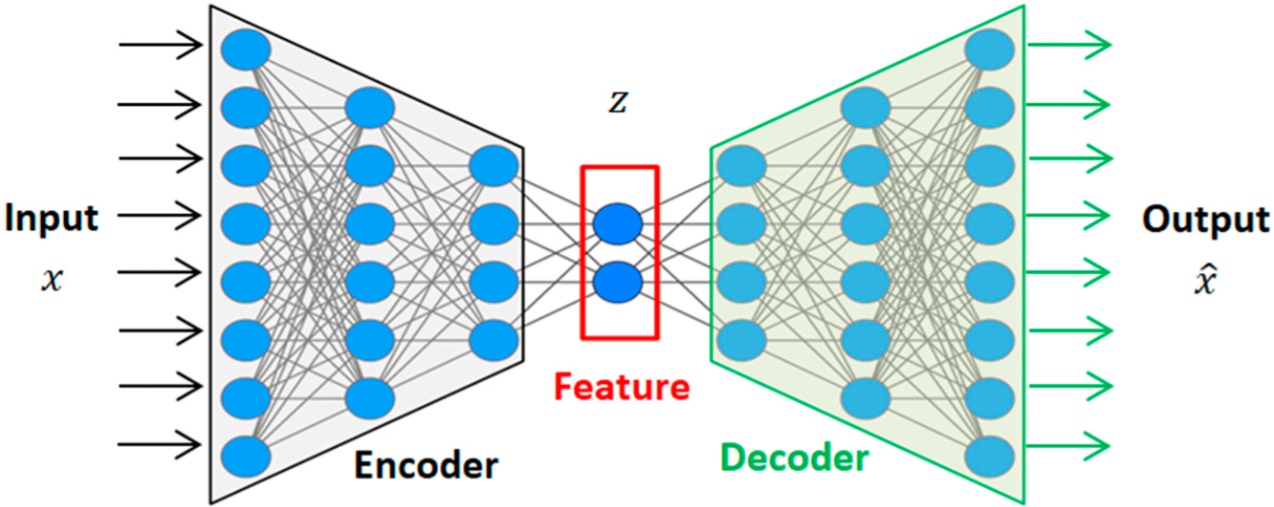            
#### 장점은?
- 단일 포인트 벡터가 아니라 확률적 잠재 분포로 사용자 선호 모델링 => 불확실성 반영
- 희소한 상호작용 데이터에서도 강건 
#### 목적 함수와 KL Divergnce
: VAE의 우수성은 목적 함수에 있음, 아래의 두 가지 목표 동시에 최적화
1. 재구성 오차 최소화: 디코더가 잠재 벡터 z를 사용하여 원래 입력 x를 최대한 비슷하도록 복원
2. KL Divergence 항: 인코더가 출력하는 잠재 분포가 사전 분포와 유사하도록 강제, 모델이 특정 데이터에 과적합하여 잠개 종간을 불규칙하게 만드는 것 방지, 잠재 공간을 넓고 부드럽게 유지 
#### VAE-CF의 주요 장점
1. 확률적 잠재 분포 모델링
2. 희소한 상호작용 데이터에서도 강건함
3. 비선형성 학습 

### => VAE의 비선형성과 확률적 잠재 공간 덕분에 불확실성이 반영된 사용자-아이템 패턴을 학습하여 희소 데이터에서도 강건한 추천 가능해짐!

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-2. GNN 기반 모델 </span> 
#### 필요성!
: VAE와 같은 딥러닝 잠재 요인 모댈도 '관계'나 '순서' 풍부한 정보는 활용 못함 
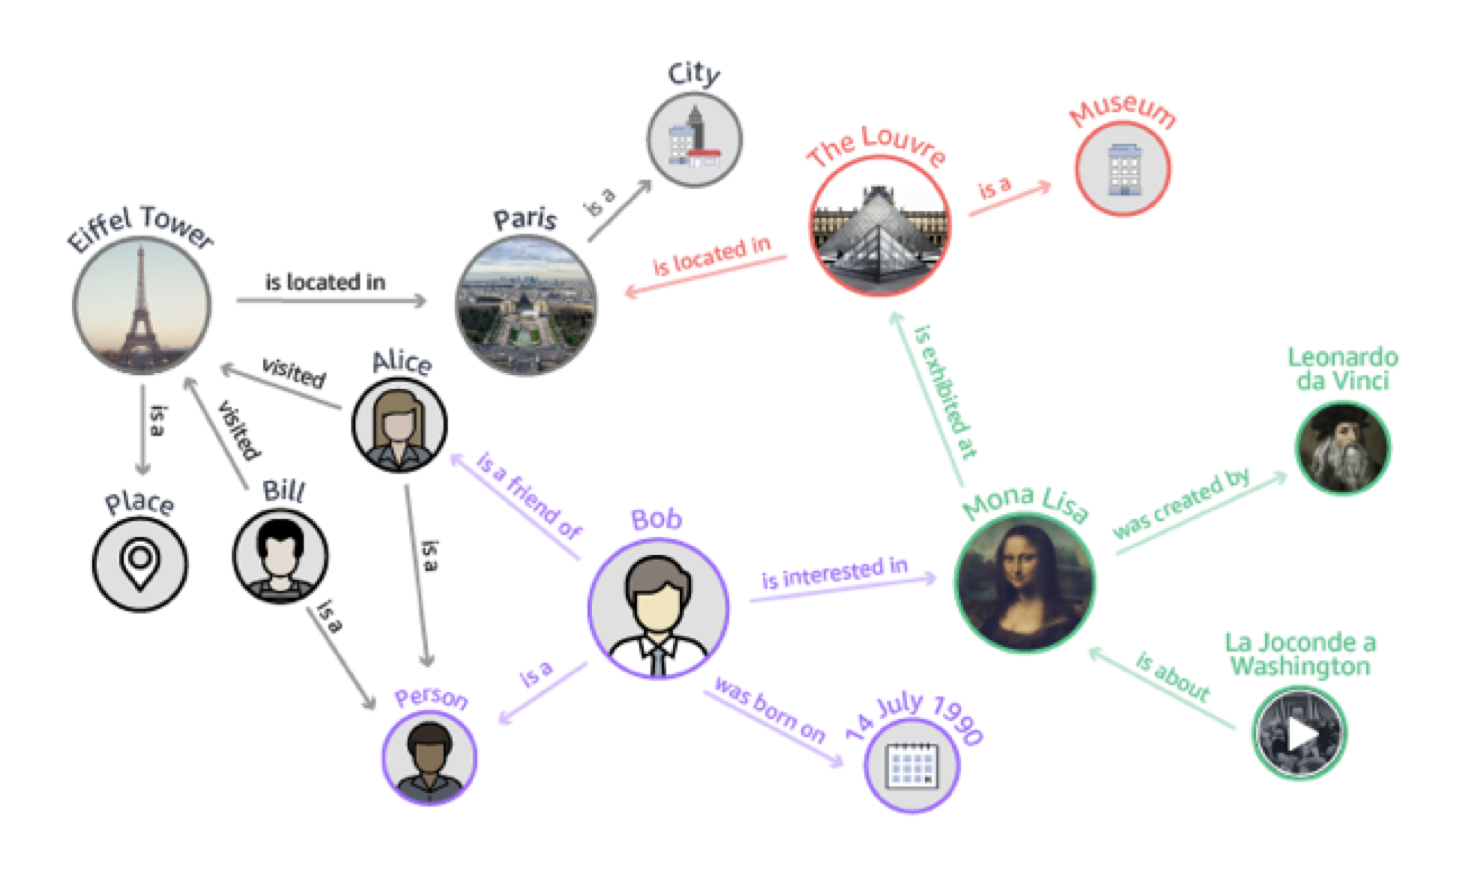         
GNN은 사용자와 아이템의 상호작용을 '누가 무엇을 좋아했다'의 집합으로 보는 것을 너머 서로 연결된 거대한 관계망을 형성한다는 점에서 모티브를 얻음!
#### 즉, 사용자-아이템 상호작용은 본질적으로 그래프(Graph)!!!
#### 그래프(Graph)는?
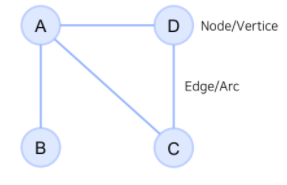       
: 노드와 그 노드를 잇는 선을 모아 구성한 자료 구조 
- 노드는? 현실 세계의 개체 
- 앳지는? 개체 간 관계나 상호작용, 방향 정보와 가중치 포함할 수 있다!
#### 사용하는 이유는?
1. 관계, 상호작용 같이 다소 추상적인 개념을 다루기에 적합
2. Non-Euclidean space도 표현하고 학습
- 흔히 다루는 이미지, 텍스트, 정형 데이터는 격자 형태로 표현
- 그러나 현실 세계의 많은 데이터는 격자 구조 아님
=> 그래프는 비유클리드 공간의 데이터를 표현하기 위한 자료 구조 
=> 관계와 구조가 복잡하고 불규칙한 데이터 모델링, 학습 
#### 구조는?
1. 그래프 생성
2. 메시지 패싱
3. 최종 출력 
#### 핵심 아이디어: 내 이웃 노드의 정보를 나에게 전달/요약 
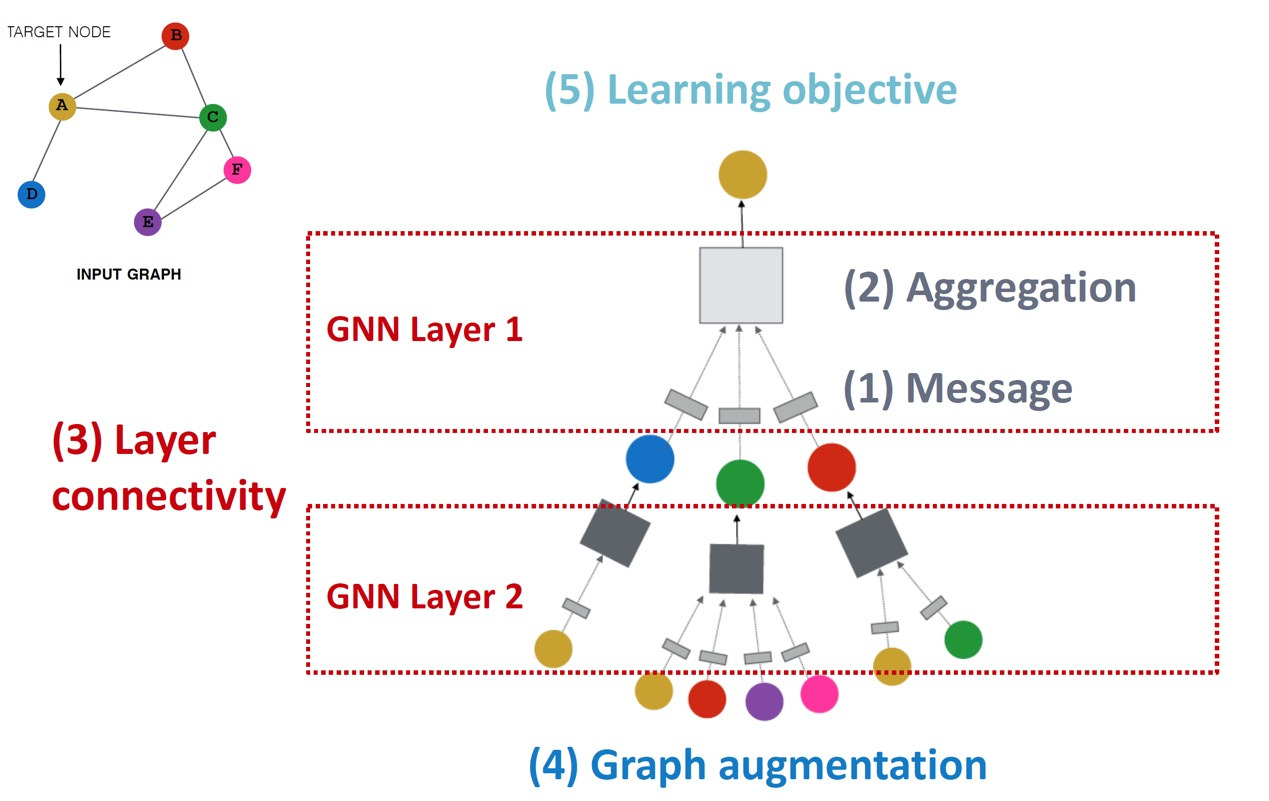

#### LightGCN
: GCN의 한 종류, 추천시스템에 특화된 GNN, 복잡성 제거, 최적화 
1. 특징 변환 제거
2. 비선형 활성화 함수 제거 
#### => 정규화된 이웃 임베딩의 합만으로 구성 
#### => 그래프 구조와 전파라는 뼈대만 남긴 가볍고 효율 좋은 모델👍

#### 장점은?
1. 고차원 협업 시그널
2. 정형화되지 않은 데이터 학습 가능
3. Cold Start 문제 완화에 효과적

#### 단점도..
1. 과평탄화 문제
2. 과압축 문제
3. 계산 복잡도⬆
4. 해석 어려움 

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-3. Transformer 기반 모델 </span> 

#### CF의 순차적 한계는?
- 순서 무시
- 문맥 부족
- 예측의 한계

#### GNN의 순차적 한계는??
- 지역적 정보 전파의 한계
- 장기 의존성 문제 

### 그럼 Transformer는? 
: 사용자 행동을 순서(Sequence)로 접근하자!
#### 왜? 
: 트랜스포머는 시퀀그 내 문맥과 핵심 의도를 파악하는데 강력!
#### Self-Attention
: 시퀀스 내 모든 아이템 간의 관계를 거리에 상관없이 동시 계산

> 연산 과정: 관련성을 계산하여 가중치를 만듦
1. 어텐션 스코어 계산: 쿼리가 모든 키와 얼마나 유사한지 유사도를 통해 관련성 점수 계산
2. 가중합이 관련성 점수를 가중치로 변환
3. 이 가중치를 각 아이템의 벨류에 곱하여 모두 더함
=> 아이템 간 관련성에 따라 정보 반영률이 차등 적용
=> 현재 토너와 관련성이 높은 프린트의 정보는 강하게 반영, 
=> 관련성이 낮은 가습기의 정보는 약하게 반영된 새로운 문맥 벡터 생성 

#### 주요 추천 시스템 모델
1. SASRec
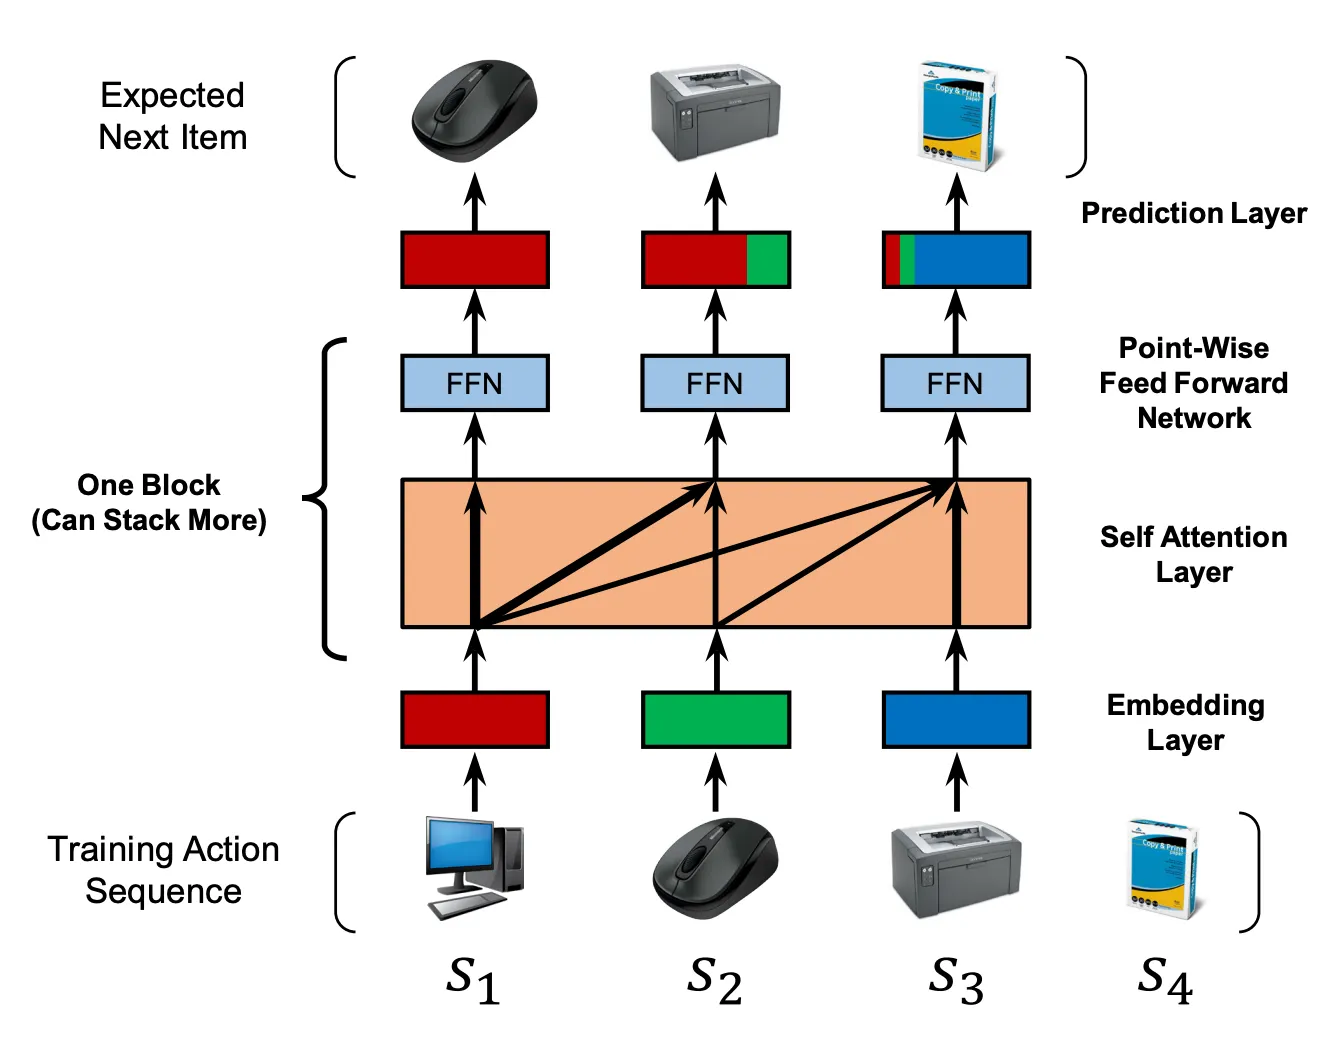 
- 방식: 단방향 어텐션 
- 어텐션 계산: 현재 아이템은 오직 과거의 아이템들만 참조
- 목표: 다음 아이템 예측
- 문제점: 계산량 많다, 단반향성 

2. BERT4Rec
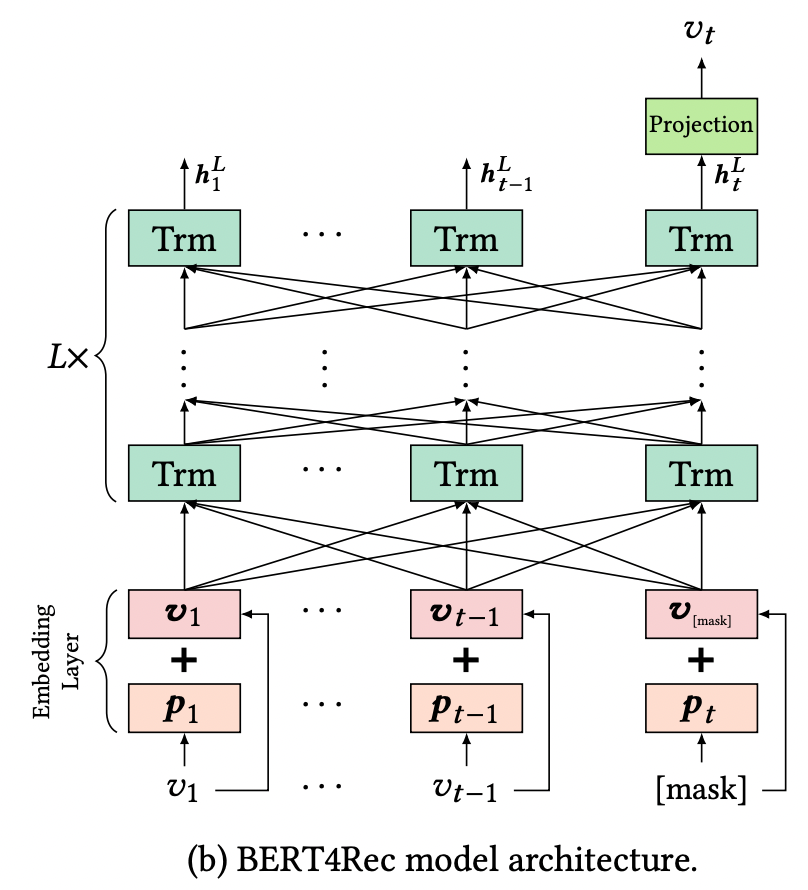
- 방식: 양방향 어텐션
- 어텐션 계산: 시퀀스의 일부를 마스크 토큰으로 일부러 가림, 가려진 아이템이 과거와 미래의 모든 아이템 참조
- 목표: 시퀀스 내 가려진 아이템 예측

### 최근 딥러닝 추천시스템 트렌드

#### LLM이 추천의 패러다임을 바꾸고 있다!

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-1. 선형 모델 vs 딥러닝 모델 (서로 차이점) </span>

#### 관점의 전환: 추천을 랭킹이 아닌 언어 문제로..
- 과거에는 조합별로 미리 학습된 공식에 따라 점수 출력
- LLM: 추천을 점수 계산이 아닌 문장으로 출력
#### 새로운 가능성?
- 대화형 추천: 자연어 요청을 직접 이해하고 추천
- Zero-shot 추천: 학습 데이터에 없던 새로운 아이템도 아이템의 텍스트 설명만으로 그럴싸한 추천 가능 
#### P5/TALLRec
- P5: 모든 추천 과제를 LLM이 풀 수 있도록 통일시킨 모델 
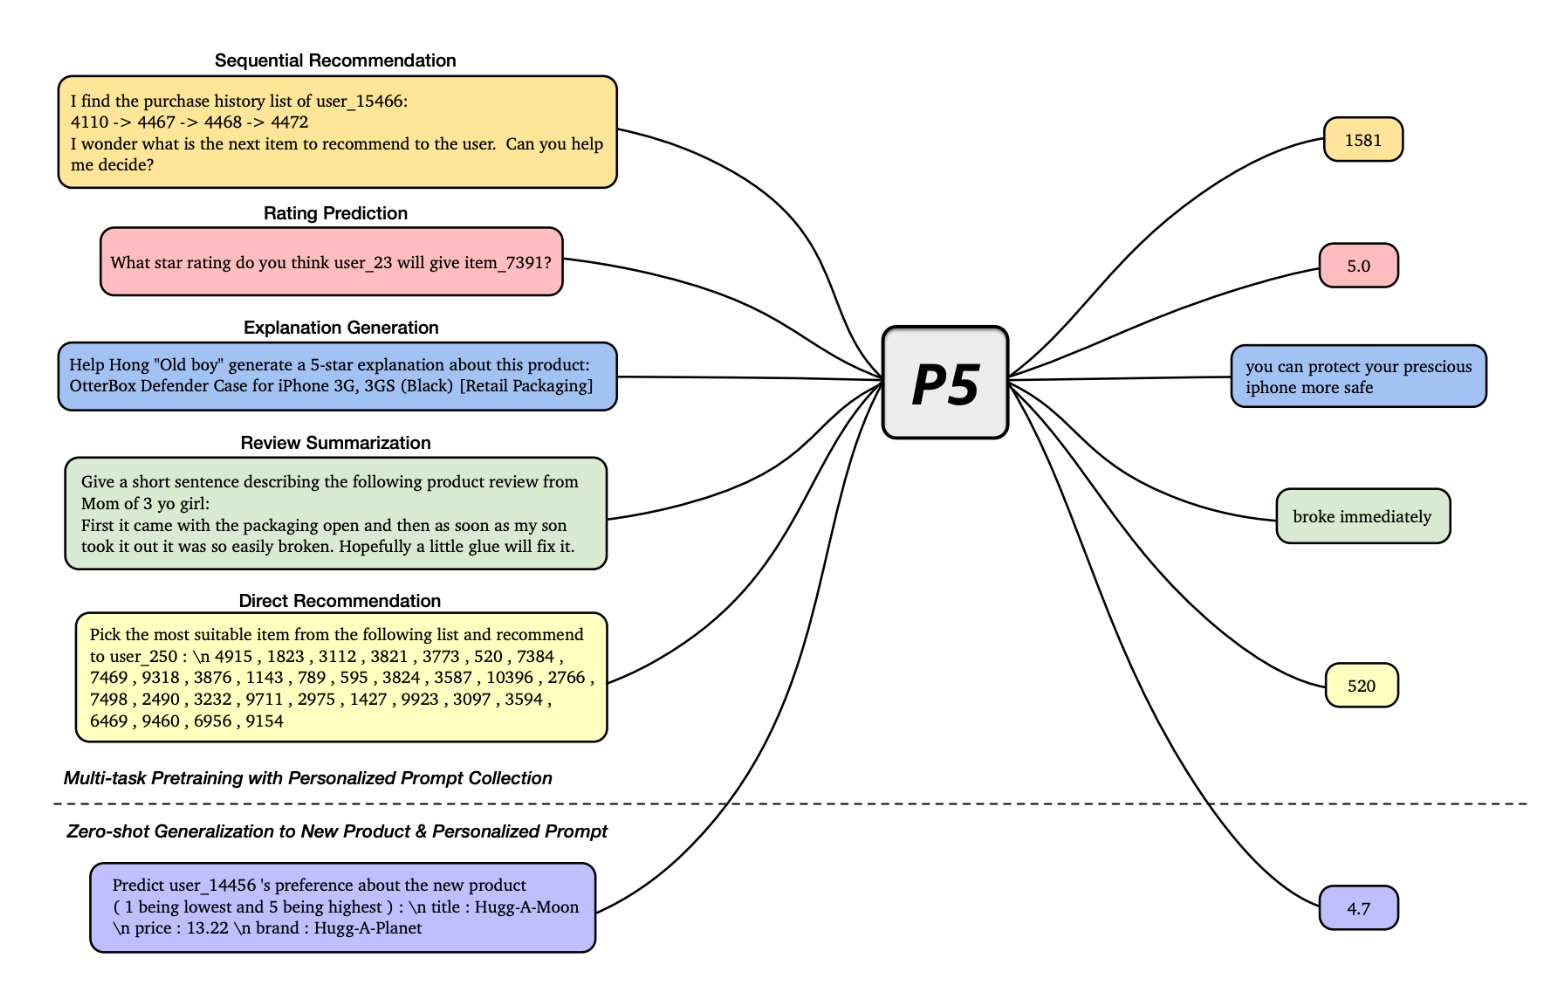
- TALLRec: 이미 잘 만들어진 범용 LLM을 추천 작업에 맞게 효율적으로 튜닝하는 프레임워크
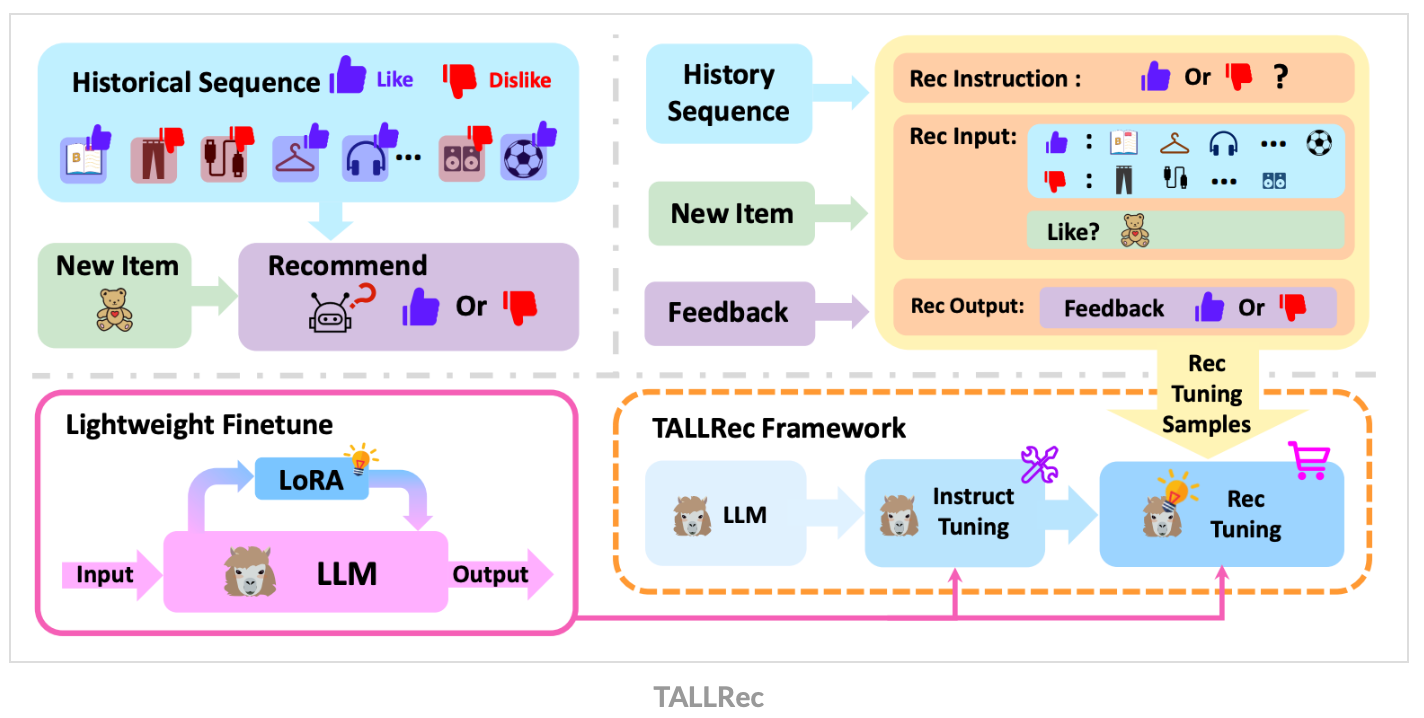
#### => LLM은 추천 시스템이 사용자와 상호작용하는 방식을 근본적으로 바꾸는 중!
#### 현업의 고민
1. 인기 편향
2. 설명가능성 
=> 최고의 모델은 가장 정확한 모델이 아닌, 편향과 공정성 고려, 그 추천 근거를 설명할 수 있는 책임감있는 모델!
선형 모댈: 빠르다! 안정적이다! 해석 용이하다!
딥러닝/LLM: 강력하다! 무겁다! 복잡하다!

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-2. 왜 같이 사용되는가? </span>

#### 딥러닝을 전면 도입하기엔 너무 비싸다..
- GPU가 필요하므로 연산량 폭발,,
- 막대한 서버ㅂㅣ,,,
- 대규모 트래픽 서비스에서는 지속 비용 감당 불가ㅜㅜ
#### => 선형 기반 추천 시스템과 병행!
1. 후보군 생성: 수백, 수천만 개의 전체 아이템 중 사용자가 조금이라도 좋아할 아이템 매우 빠르게 골라냄 <선형 모델>
2. 순위 매기기: 1단계에서 추려진 후보군 대상 사용자가 가장 좋아할 순서대로 정교하게 순위 매김 <딥러닝 모델>